# Rank Features of a Smartphone - Build a Python Application to Classify and Rank Dataset.

# Attributes of mobile

battery_power: Total energy a battery can store in one time measured in mAh
blue: Has bluetooth or not
clockspeed: speed at which microprocessor executes instructions
dual_sim: Has dual sim support or not
fc: Front Camera mega pixels
four_g: Has 4G or not
int_memory: Internal Memory in Gigabytes
m_dep: Mobile Depth in cm
mobile_wt: Weight of mobile phone
n_cores: Number of cores of processor
pc: Primary Camera mega pixels
px_height: Pixel Resolution Height
px_width: Pixel Resolution Width
ram: Random Access Memory in Mega Bytes
sc_h: Screen Height of mobile in cm
sc_w: Screen Width of mobile in cm
talk_time: longest time that a single battery charge will last when you are
three_g: Has 3G or not
touch_screen: Has touch screen or not
wifi: Has wifi or not
price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

# Importing libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To filter/truncate warnings
import warnings
warnings.filterwarnings('ignore')

# Read the test Dataset into Python Environment

In [2]:
test_data=pd.read_csv(r"C:\Users\User\Desktop\MobileDataSets\MobileTest.csv")
test_data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [3]:
#The test dataset contains 1000 rows and 21 columns

In [4]:
test_data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [6]:
#Basic information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [8]:
#Statistical information
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [9]:
test_data.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [10]:
#The test data doesnot contain any categorical values.All values are numerical type

In [12]:
#Checking for null values.
test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [13]:
#The test data does not contains any missing values in it

# Read the train data to the python environment

In [14]:
train_data=pd.read_csv(r"C:\Users\User\Desktop\MobileDataSets\MobileTrain.csv")
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [15]:
#The train data contains 2000 rows and 21 columns
#price_range is the Target variable

In [16]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [18]:
#Basic information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [20]:
#Statistical information
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
train_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [22]:
#There are no categorical values in train data.All the values are of numerical type.

In [24]:
#Checking for null values.
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
#There are no missing values in the train data

# Exploratory Data Analysis

# Univariate Analysis

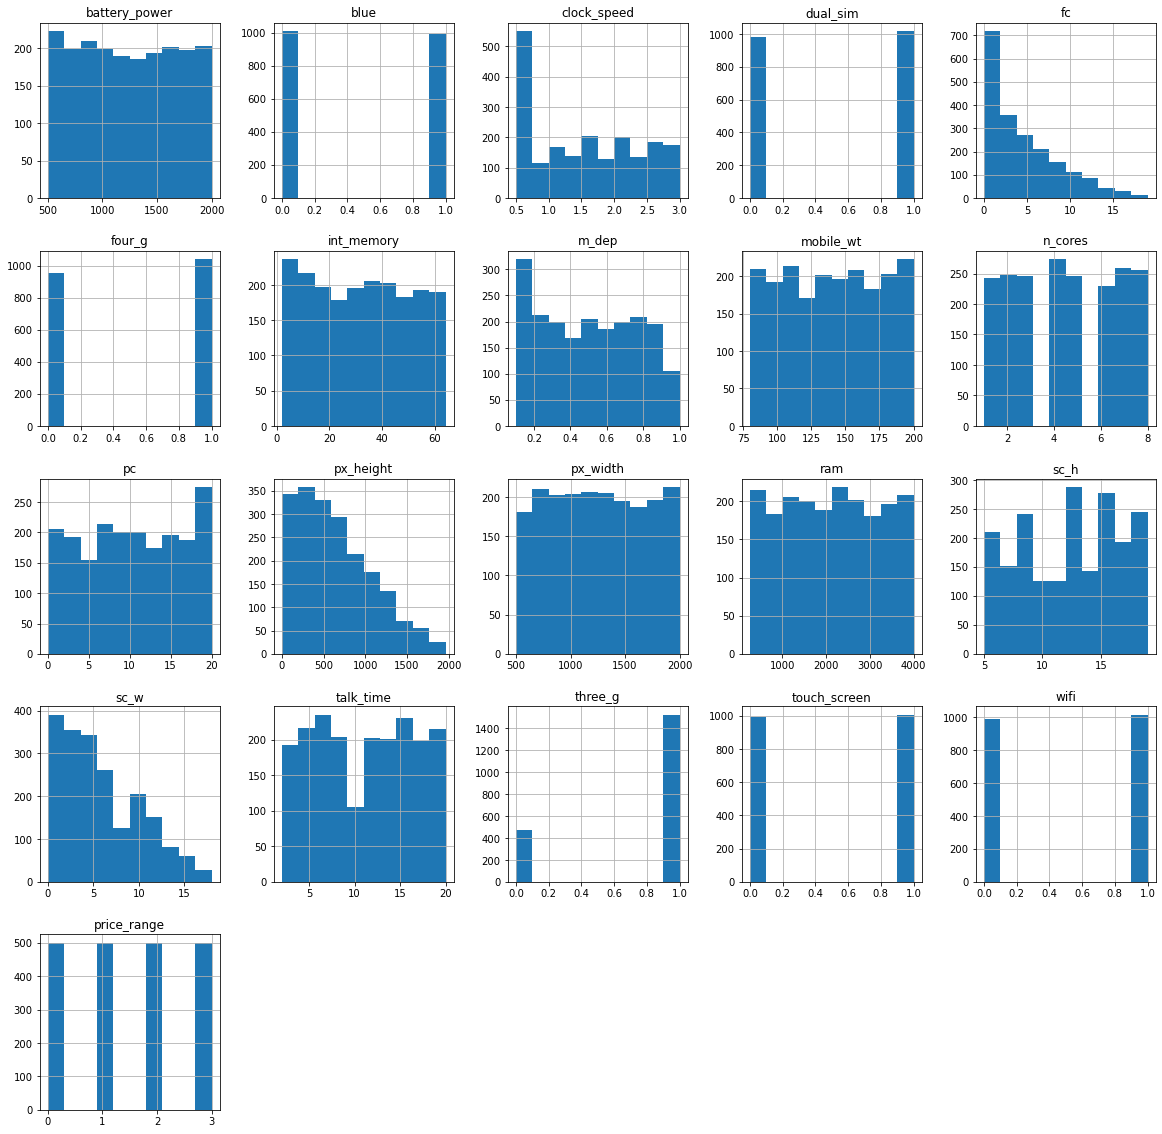

In [26]:
#Plotting the histogram to understand more about variables
train_data.select_dtypes(include=['int64','float64']).hist(figsize = (20,20))
plt.show()

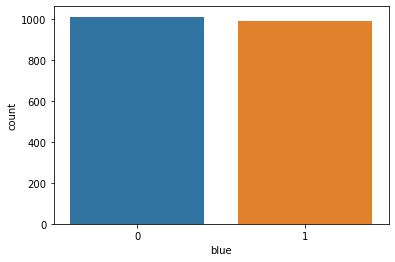

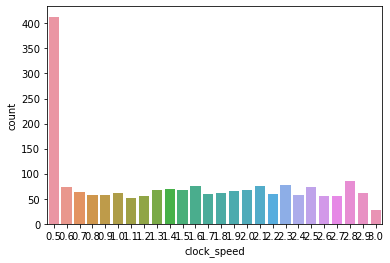

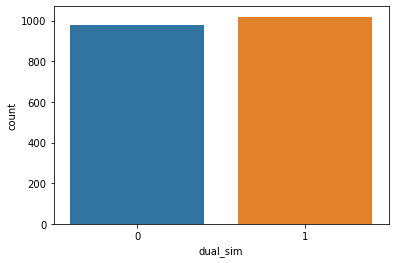

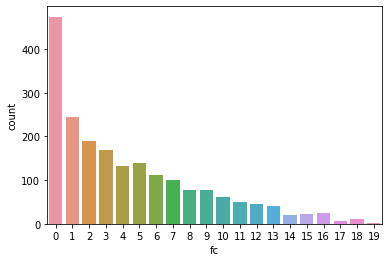

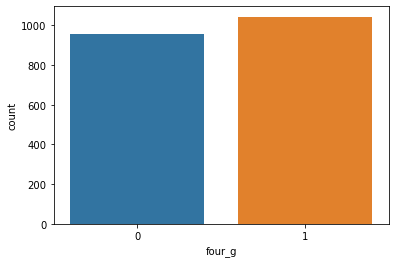

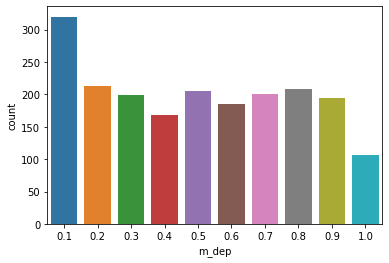

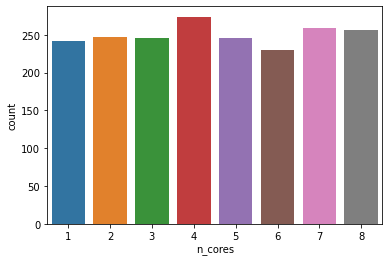

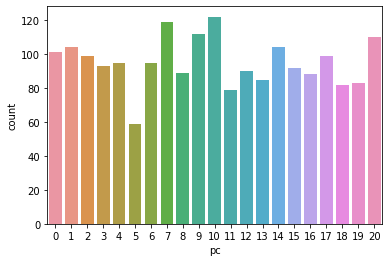

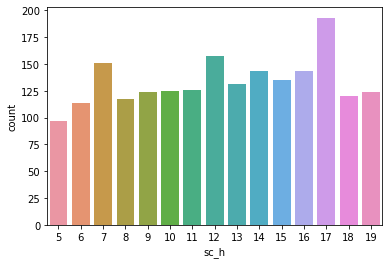

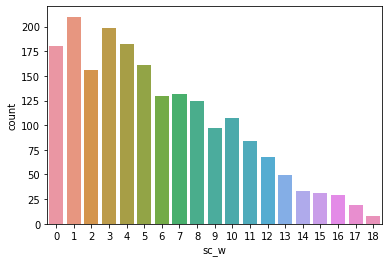

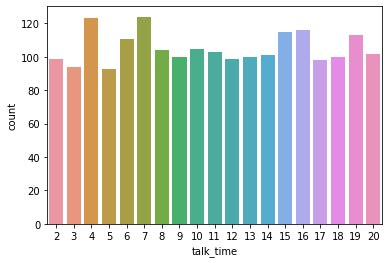

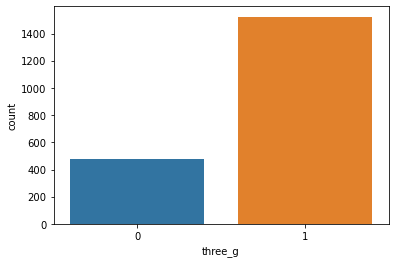

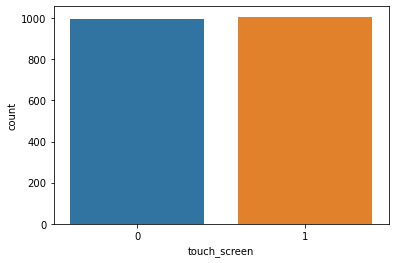

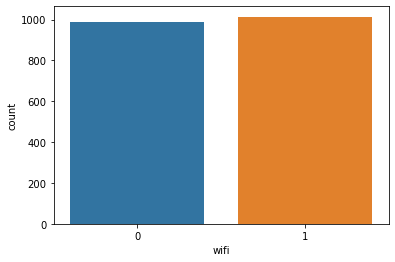

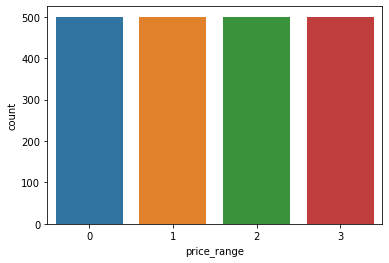

In [27]:
#CountPlot for various columns
for i in train_data:
    if(train_data[i].nunique()<30):
        sns.countplot(x=train_data[i])
        plt.show()

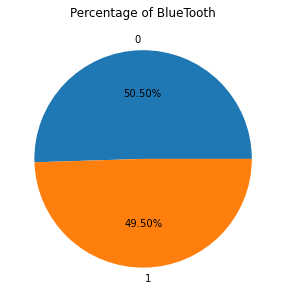

In [28]:
#Analysis based on Percentages using Pie Chart
count=train_data["blue"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of BlueTooth")
plt.show()

50.50% smartphones sold have BlueTooth and 49.50% doesn't have it.

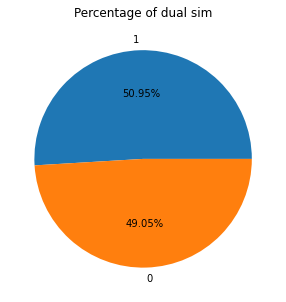

In [29]:
count=train_data["dual_sim"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of dual sim")
plt.show()

50.95% smartphones sold have dual sim and 49.05% doesn't have it.

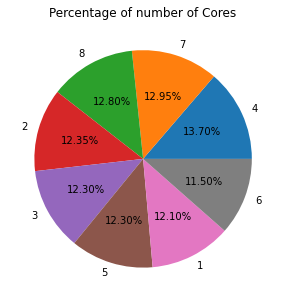

In [30]:
count=train_data["n_cores"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of number of Cores")
plt.show()

Smartphones with Quad Core are the most sought after.

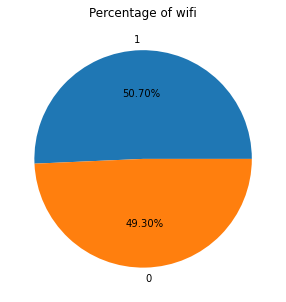

In [32]:
count=train_data["wifi"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of wifi")
plt.show()

50.70% of the smartphones sold have wifi and 49.30% don't have it.

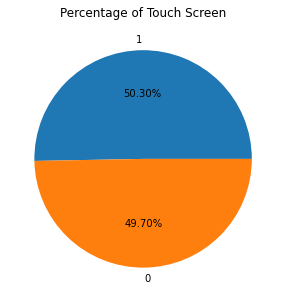

In [33]:
count=train_data["touch_screen"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=count.index,autopct='%1.2f%%')
plt.title("Percentage of Touch Screen")
plt.show()

50.30% smartphones sold have Touch screen and 49.70% doesn't have it.

# Bivariate Analysis

In [34]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

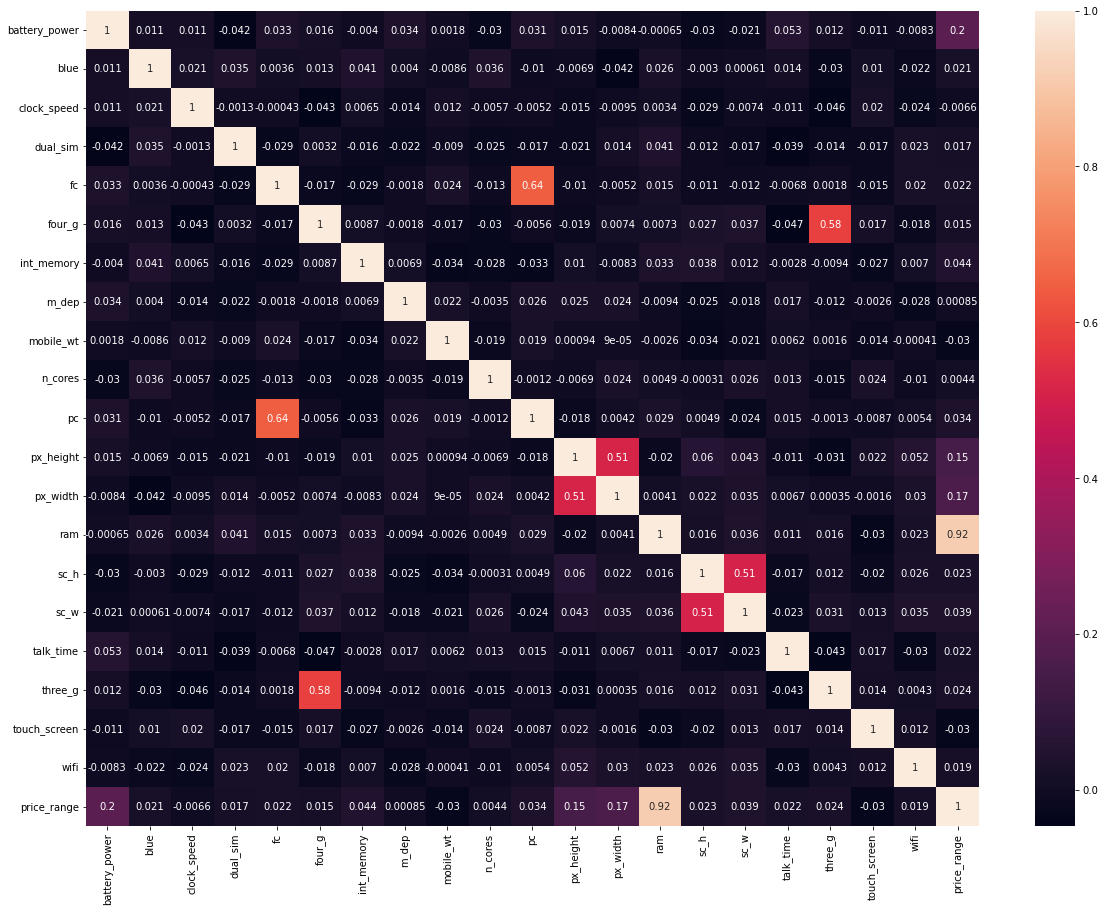

In [35]:
#Analysis on numerical data
#Heat map to find the correlation between features
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

Price_range is highly correlated with ram. Nothing else is significant.

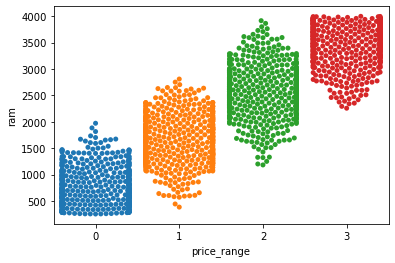

In [36]:
sns.swarmplot(x = "price_range",y = "ram",data =train_data)
plt.show()

In the mobile dataset ram has high correlation so i want to check the ram range for each price here swarm plot shows the range.For high price the ram is quite high.

In [44]:
# Bivariate Analysis on features.

<AxesSubplot:xlabel='price_range', ylabel='ram'>

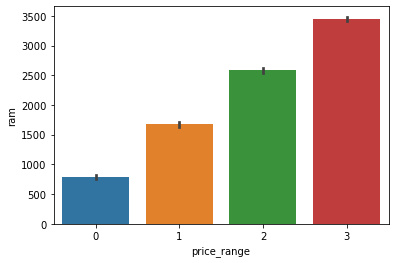

In [39]:
plt.figure()
sns.barplot(y="ram", x="price_range", data=train_data)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

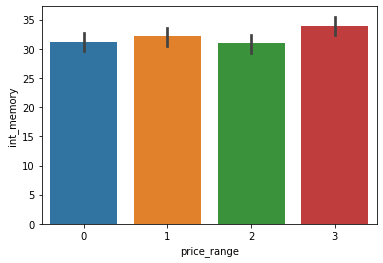

In [40]:
plt.figure()
sns.barplot(y="int_memory", x="price_range", data=train_data)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

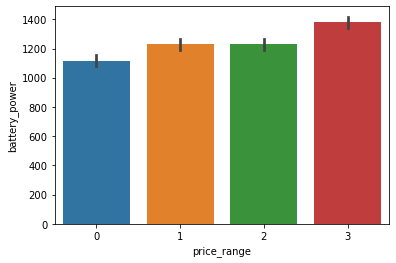

In [41]:
plt.figure()
sns.barplot(y="battery_power", x="price_range", data=train_data)

<AxesSubplot:xlabel='price_range', ylabel='touch_screen'>

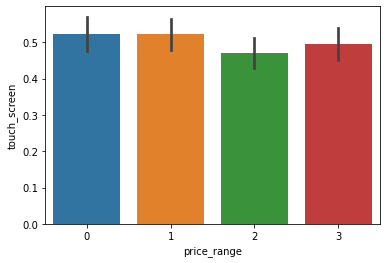

In [42]:
plt.figure()
sns.barplot(y="touch_screen", x="price_range", data=train_data)

<AxesSubplot:xlabel='price_range', ylabel='px_width'>

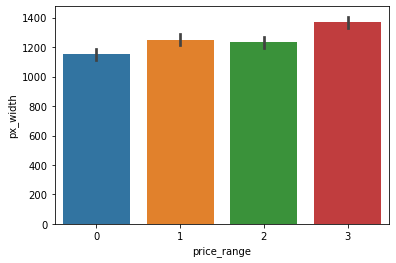

In [43]:
plt.figure()
sns.barplot(y="px_width", x="price_range", data=train_data)

# Outlier Detection

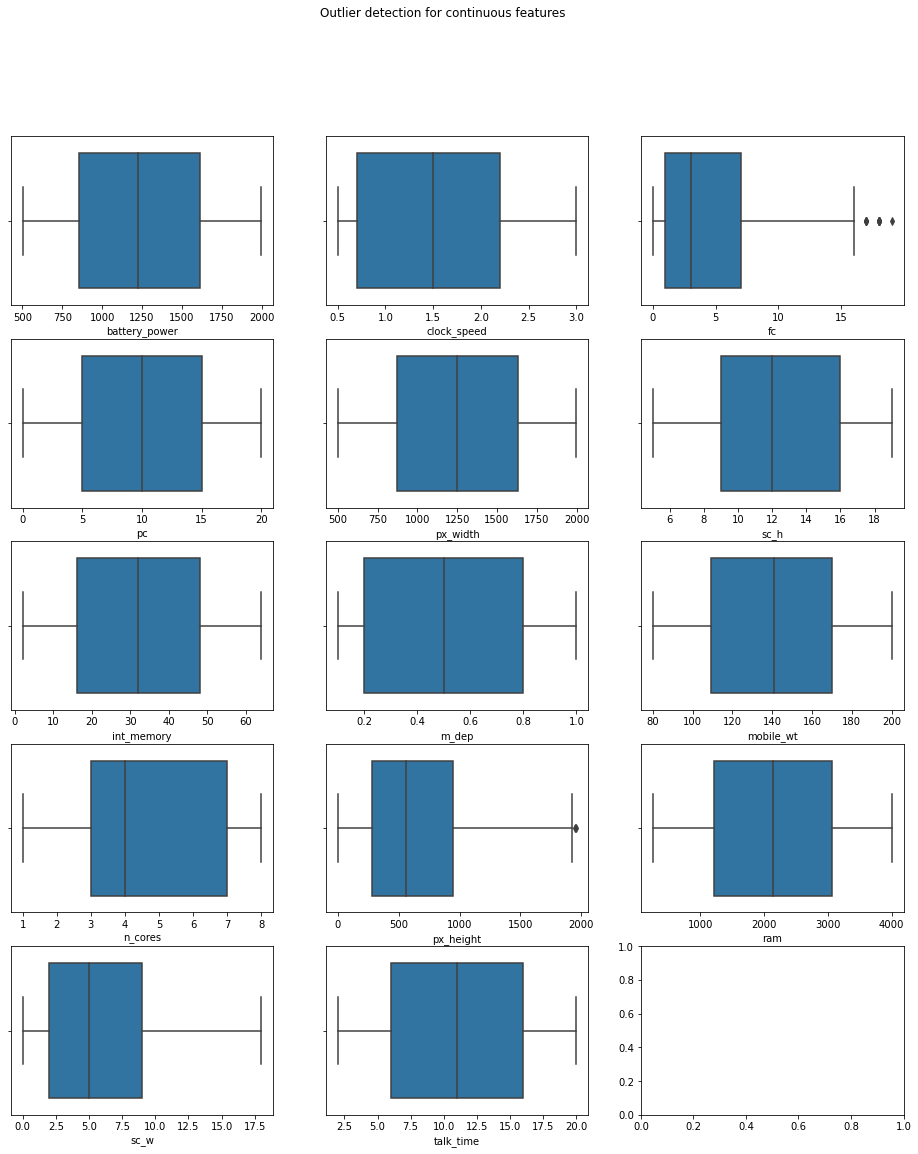

In [45]:
fig,axes = plt.subplots(5,3,figsize = (16,18))
fig .suptitle("Outlier detection for continuous features")
sns.boxplot(x=train_data['battery_power'],ax=axes[0,0])
sns.boxplot(x=train_data['clock_speed'],ax=axes[0,1])
sns.boxplot(x=train_data['fc'],ax=axes[0,2])
sns.boxplot(x=train_data['pc'],ax=axes[1,0])
sns.boxplot(x=train_data['px_width'],ax=axes[1,1])
sns.boxplot(x=train_data['sc_h'],ax=axes[1,2])
sns.boxplot(x=train_data['int_memory'],ax=axes[2,0])
sns.boxplot(x=train_data['m_dep'],ax=axes[2,1])
sns.boxplot(x=train_data['mobile_wt'],ax=axes[2,2])
sns.boxplot(x=train_data['n_cores'],ax=axes[3,0])
sns.boxplot(x=train_data['px_height'],ax=axes[3,1])
sns.boxplot(x=train_data['ram'],ax=axes[3,2])
sns.boxplot(x=train_data['sc_w'],ax=axes[4,0])
sns.boxplot(x=train_data['talk_time'],ax=axes[4,1])
plt.show()

In [48]:
#There are few outliers in the dataset which are not considered here as outliers.

# Classify the datset into software and hardware

In [50]:
data1 = train_data.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','price_range']]
data1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,0


In [51]:
data2 = train_data.loc[:,['talk_time','three_g','wifi','touch_screen','clock_speed']]
data2

,talk_time,three_g,wifi,touch_screen,clock_speed
0,19,0,1,0,2.2
1,7,1,0,1,0.5
2,9,1,0,1,0.5
3,11,1,0,0,2.5
4,15,1,0,1,1.2
...,...,...,...,...,...
1995,19,1,0,1,0.5
1996,16,1,1,1,2.6
1997,5,1,0,1,0.9
1998,19,1,1,1,0.9


In [52]:
#Merging Datasets

In [53]:
data3 = pd.concat([data1, data2], axis=1)
data3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,price_range,talk_time,three_g,wifi,touch_screen,clock_speed
0,842,0,0,1,0,7,0.6,188,2,2,...,756,2549,9,7,1,19,0,1,0,2.2
1,1021,1,1,0,1,53,0.7,136,3,6,...,1988,2631,17,3,2,7,1,0,1,0.5
2,563,1,1,2,1,41,0.9,145,5,6,...,1716,2603,11,2,2,9,1,0,1,0.5
3,615,1,0,0,0,10,0.8,131,6,9,...,1786,2769,16,8,2,11,1,0,0,2.5
4,1821,1,0,13,1,44,0.6,141,2,14,...,1212,1411,8,2,1,15,1,0,1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,...,1890,668,13,4,0,19,1,0,1,0.5
1996,1965,1,1,0,0,39,0.2,187,4,3,...,1965,2032,11,10,2,16,1,1,1,2.6
1997,1911,0,1,1,1,36,0.7,108,8,3,...,1632,3057,9,1,3,5,1,0,1,0.9
1998,1512,0,0,4,1,46,0.1,145,5,5,...,670,869,18,10,0,19,1,1,1,0.9


In [54]:
X=train_data.drop(['price_range'],axis=1)
y=train_data['price_range']

In [55]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 12 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 12 best features

         Features          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556


In [56]:
#Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [57]:
print(model.feature_importances_)

[0.06250214 0.01985287 0.03356162 0.02044288 0.03228813 0.01745407
 0.03376699 0.03503047 0.03652791 0.0335329  0.03390256 0.04677969
 0.04934012 0.39143355 0.03376929 0.0335153  0.03460486 0.01427618
 0.01767822 0.01974026]


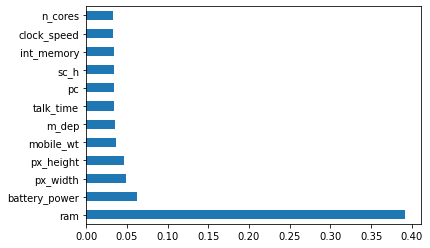

In [58]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(12).plot(kind='barh')
plt.show()

# Feature Scaling

In [123]:
#Standardization
from sklearn.preprocessing import StandardScaler

X=train_data.drop("price_range" , axis=1)
y=train_data["price_range"]

scaler= StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)

In [125]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.128298e-16,-1.927347e-16,-2.172151e-16,3.990142e-16,9.230117e-17,-2.048361e-16,-8.754109e-17,-1.045830e-16,1.804112e-16,-4.690692e-17,1.669775e-16,1.287304e-16,5.595524e-17,-1.582068e-16,3.719247e-17,-4.085621e-17,1.052491e-16,2.184919e-16,3.065326e-16,4.278800e-16
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


# Splitting of Dataset

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [127]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (1500, 20)
X_test: (500, 20)
y_train: (1500,)
y_test: (500,)


# Modelling

In [128]:
y=train_data["price_range"]
y.value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

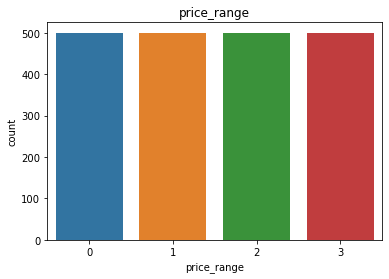

In [129]:
sns.countplot(y)
plt.title("price_range")
plt.show()

Target column price_range is balanced

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred = logit_model.predict(X_test)

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score, recall_score, f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Logistic Regression ")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.962
Results from Logistic Regression 


,precision,recall,f1-score,support
0,0.983871,0.976000,0.979920,125.000000
1,0.936364,0.936364,0.936364,110.000000
2,0.928000,0.958678,0.943089,121.000000
3,0.992908,0.972222,0.982456,144.000000
accuracy,0.962000,0.962000,0.962000,0.962000
macro avg,0.960286,0.960816,0.960457,500.000000
weighted avg,0.962501,0.962000,0.962155,500.000000


In [139]:
confusion_matrix(y_test,y_pred)

array([[122,   2,   0,   0],
       [  3, 103,   4,   0],
       [  0,   5, 116,   4],
       [  0,   0,   1, 140]], dtype=int64)

# Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train,y_train)
y_pred=dt_model.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Decision Tree")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.868
Results from Decision Tree


,precision,recall,f1-score,support
0,0.911290,0.918699,0.914980,123.000000
1,0.836364,0.793103,0.814159,116.000000
2,0.800000,0.833333,0.816327,120.000000
3,0.914894,0.914894,0.914894,141.000000
accuracy,0.868000,0.868000,0.868000,0.868000
macro avg,0.865637,0.865007,0.865090,500.000000
weighted avg,0.868214,0.868000,0.867888,500.000000


In [141]:
confusion_matrix(y_test, y_pred )

array([[113,  11,   0,   0],
       [ 10,  92,   8,   0],
       [  0,  13, 100,  12],
       [  0,   0,  12, 129]], dtype=int64)

# K-NN

In [142]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] 
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)
print(acc_values)  

[0.482, 0.512, 0.506, 0.514, 0.506, 0.53, 0.546, 0.556, 0.538, 0.558, 0.574, 0.59]


Text(0, 0.5, 'Accuracy')

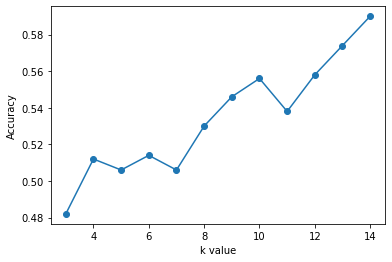

In [143]:
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [148]:
classifier = KNeighborsClassifier(n_neighbors = 15,metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy score is :',accuracy_score(y_test,y_pred))
print("Results from K-NN")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

accuracy score is : 0.598
Results from K-NN


,precision,recall,f1-score,support
0,0.725806,0.720000,0.722892,125.000000
1,0.536364,0.427536,0.475806,138.000000
2,0.512000,0.467153,0.488550,137.000000
3,0.609929,0.860000,0.713693,100.000000
accuracy,0.598000,0.598000,0.598000,0.598000
macro avg,0.596025,0.618672,0.600235,500.000000
weighted avg,0.591762,0.598000,0.588647,500.000000


In [145]:
confusion_matrix(y_test,y_pred)

array([[90, 30,  4,  0],
       [28, 59, 21,  2],
       [ 7, 42, 64, 12],
       [ 0,  7, 48, 86]], dtype=int64)

# RandomForest Classifier

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [151]:
y_pred = rf_model.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from RandomForest Classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.866
Results from RandomForest Classifier


,precision,recall,f1-score,support
0,0.983871,0.945736,0.964427,129.000000
1,0.827273,0.805310,0.816143,113.000000
2,0.712000,0.801802,0.754237,111.000000
3,0.929078,0.891156,0.909722,147.000000
accuracy,0.866000,0.866000,0.866000,0.866000
macro avg,0.863055,0.861001,0.861132,500.000000
weighted avg,0.872015,0.866000,0.868170,500.000000


In [152]:
confusion_matrix(y_test,y_pred)

array([[122,   2,   0,   0],
       [  7,  91,  12,   0],
       [  0,  20,  89,  16],
       [  0,   0,  10, 131]], dtype=int64)

# SVM

In [153]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
am_svm = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy of SVM classifier is {}".format(am_svm))
print("Results from SVM")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy of SVM classifier is 89.0
Results from SVM


,precision,recall,f1-score,support
0,0.983871,0.945736,0.964427,129.000000
1,0.827273,0.805310,0.816143,113.000000
2,0.712000,0.801802,0.754237,111.000000
3,0.929078,0.891156,0.909722,147.000000
accuracy,0.866000,0.866000,0.866000,0.866000
macro avg,0.863055,0.861001,0.861132,500.000000
weighted avg,0.872015,0.866000,0.868170,500.000000


In [154]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[122   2   0   0]
 [  7  91  12   0]
 [  0  20  89  16]
 [  0   0  10 131]]


# Gradient boosting classifier

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred=GBC.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from Gradient boosting classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

Accuracy is: 0.922
Results from Gradient boosting classifier


,precision,recall,f1-score,support
0,0.975806,0.975806,0.975806,124.000000
1,0.909091,0.900901,0.904977,111.000000
2,0.872000,0.865079,0.868526,126.000000
3,0.929078,0.942446,0.935714,139.000000
accuracy,0.922000,0.922000,0.922000,0.922000
macro avg,0.921494,0.921058,0.921256,500.000000
weighted avg,0.921846,0.922000,0.921902,500.000000


In [156]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[121   3   0   0]
 [  3 100   7   0]
 [  0   8 109   8]
 [  0   0  10 131]]


# XG Boost classifier

In [157]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Results from XG Boost classifier")
result = classification_report(y_pred,y_test,output_dict=True)
result = pd.DataFrame(result).transpose()
result.style.background_gradient(cmap="PuBuGn")

[14:14:50] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy is: 0.918
Results from XG Boost classifier


,precision,recall,f1-score,support
0,0.983871,0.953125,0.968254,128.000000
1,0.890909,0.890909,0.890909,110.000000
2,0.840000,0.889831,0.864198,118.000000
3,0.950355,0.930556,0.940351,144.000000
accuracy,0.918000,0.918000,0.918000,0.918000
macro avg,0.916284,0.916105,0.915928,500.000000
weighted avg,0.919813,0.918000,0.918645,500.000000


In [158]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[122   2   0   0]
 [  6  98   6   0]
 [  0  10 105  10]
 [  0   0   7 134]]


# Ranking of features of smartphone

In [159]:
#Ranking dataset according to price range
train_data["rank_by_price"]=train_data["price_range"].rank()
data=train_data
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [160]:
data["rank_by_price"]=data["rank_by_price"].sort_values()
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,250.5


In [161]:
#Sorting above dataset according to ranked_price_range
data.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,1234,1086,14,7,3,1,1,0,0,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,529,1082,15,5,10,1,0,1,0,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,1495,808,11,7,5,1,1,0,0,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,812,776,7,6,8,0,0,0,0,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1513,286,14,4,17,1,0,1,0,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1040,3863,17,12,9,1,1,1,3,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,1960,3506,14,5,12,1,1,0,3,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,864,3984,17,14,8,1,1,1,3,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1977,3458,9,4,9,1,1,1,3,1750.5


In [162]:
#Ranking on all the features using rank()
RankedData = data.rank()
RankedData.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,rank_by_price
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5,1750.5


In [163]:
#Ranking all the features separately to correct output
#Because not all features are good when values are high or low
#It depends on each and every feature.
r= data
r["rank_by_price"] = r["price_range"].rank()
r["rank_by_battery"] = r["battery_power"].rank(ascending=False)
r["rank_by_blueooth"] = r["blue"].rank(ascending=False)
r["rank_by_clockspeed"] = r["clock_speed"].rank(ascending=False)
r["rank_by_DualSIM"] = r["dual_sim"].rank(ascending=False)
r["rank_by_fc"] = r["fc"].rank(ascending=False)
r["rank_by_4G"] = r["four_g"].rank(ascending=False)
r["rank_by_InternalMemory"] = r["int_memory"].rank(ascending=False)
r["rank_by_mdep"] = r["m_dep"].rank(ascending=False)
r["rank_by_weight"] = r["mobile_wt"].rank(ascending=True)
r["rank_by_ncores"] = r["n_cores"].rank(ascending=False)
r["rank_by_pc"] = r["pc"].rank(ascending=False)
r["rank_by_height"] = r["px_height"].rank(ascending=False)
r["rank_by_width"] = r["px_width"].rank(ascending=False)
r["rank_by_ram"] = r["ram"].rank(ascending=False)
r["rank_by_sch"] = r["sc_h"].rank(ascending=False)
r["rank_by_scw"] = r["sc_w"].rank(ascending=False)
r["rank_by_talktime"] = r["talk_time"].rank(ascending=False)
r["rank_by_3G"] = r["three_g"].rank(ascending=False)
r["rank_by_touchscreen"] = r["touch_screen"].rank(ascending=False)
r["rank_by_wifi"] = r["wifi"].rank(ascending=False)
r.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [164]:
RankedData = r.iloc[:,21:]
RankedData

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5
